In [127]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy.stats import ttest_ind, ttest_1samp, kruskal, f_oneway


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [26]:
display(df.head())
print(df.shape[0])

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


8594


In [86]:
df.year.value_counts()

2014    4297
2012    4297
Name: year, dtype: int64

In [28]:
df.year = df.year.replace(6, 2012)
df.year = df.year.replace(7, 2014)
df.ppltrst.shape

(8594,)

In [97]:
df.gndr = df.gndr.replace(1.0,'male')
df.gndr = df.gndr.replace(2.0,'female')

In [106]:
df.partner = df.partner.replace(1.0, 'yes')
df.partner = df.partner.replace(2.0, 'no')

In [150]:
df.ppltrst = df.ppltrst.bfill()
df.sclmeet = df.sclmeet.bfill()
df.happy = df.happy.bfill()
df.tvtot = df.tvtot.bfill()
df.gndr = df.gndr.dropna()
df.sclact = df.sclact.bfill()
df.agea = df.agea.dropna()

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


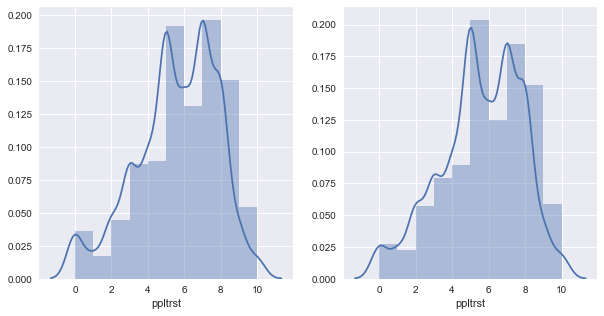

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df[df.year==2012]['ppltrst'], bins=10)
plt.subplot(1,2,2)
sns.distplot(df[df.year==2014]['ppltrst'], bins=10)
plt.show()

In [60]:
print(ttest_ind(df[df.year==2012]['ppltrst'], df[df.year==2014]['ppltrst']))

Ttest_indResult(statistic=0.10143540768798018, pvalue=0.9192071970473178)


In [61]:
df.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ES Ttest_indResult(statistic=2.4848574874593243, pvalue=0.0130273320721734)
SE Ttest_indResult(statistic=-2.0691766184617433, pvalue=0.03867084741391761)
CH Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
NO Ttest_indResult(statistic=0.5136322708122129, pvalue=0.6075868324966693)
CZ Ttest_indResult(statistic=-0.48015285875554575, pvalue=0.6311986233993581)
DE Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)


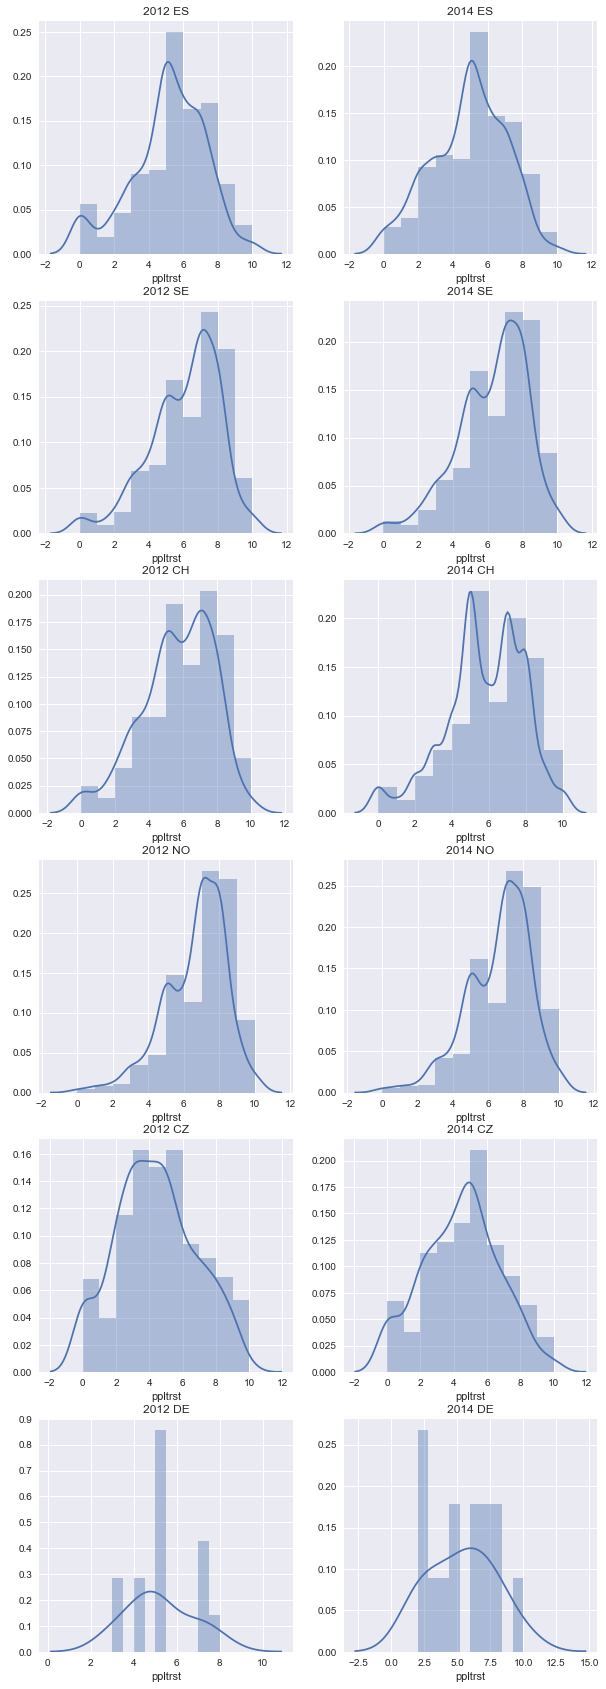

In [80]:
countries = list(df.cntry.value_counts().keys())
plt.figure(figsize=(10,30))
x=1
for country in countries:
    plt.subplot(6,2,x)
    sns.distplot(df[(df.cntry==country)&(df.year==2012)]['ppltrst'], bins=10)
    plt.title('2012 '+country)
    x+=1
    plt.subplot(6,2,x)
    sns.distplot(df[(df.cntry==country)&(df.year==2014)]['ppltrst'], bins=10)
    plt.title('2014 '+country)
    x+=1

for country in countries:
    print(country, ttest_ind(df[(df.cntry==country)&(df.year==2012)]['ppltrst'],
                             df[(df.cntry==country)&(df.year==2014)]['ppltrst']))

Based on the T-tests between the two years, it seems that there is a statistically significant increase in trust from 2012 to 2014 in respondants from ES and decrease in trust in respondants from SE. The T-test p-values for CH, NO, CZ, and DE are not significantly low to conclude that there is a change in respondant trust. 

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ES Ttest_indResult(statistic=1.672795892623242, pvalue=0.09449652545701173)
SE Ttest_indResult(statistic=-0.5925000484944, pvalue=0.5535896353355403)
CH Ttest_indResult(statistic=-0.3578726527954472, pvalue=0.7204875328212617)
NO Ttest_indResult(statistic=4.217665929174697, pvalue=2.6202602519000937e-05)
CZ Ttest_indResult(statistic=-1.265860824649876, pvalue=0.20578730209847712)
DE Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)


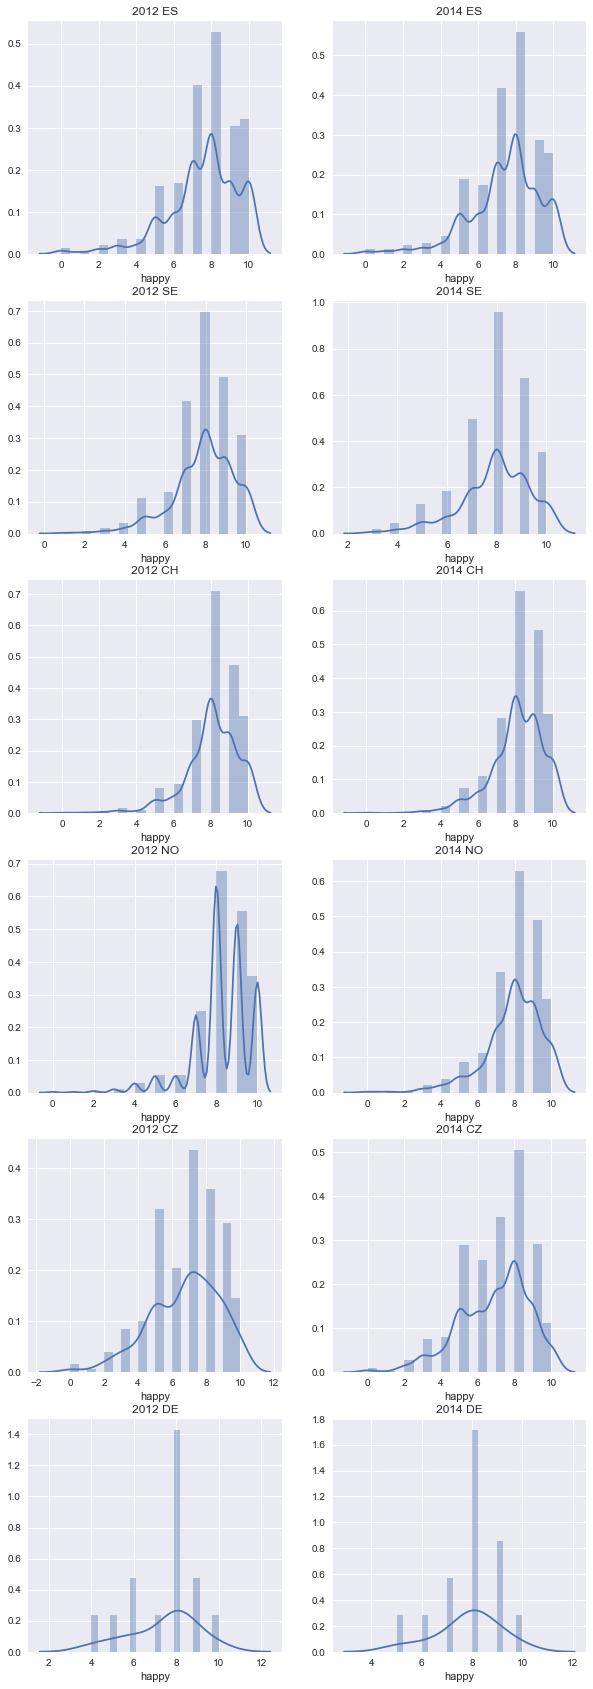

In [89]:
plt.figure(figsize=(10,30))
x=1
for country in countries:
    plt.subplot(6,2,x)
    sns.distplot(df[(df.cntry==country)&(df.year==2012)]['happy'], bins=20)
    plt.title('2012 '+country)
    x+=1
    plt.subplot(6,2,x)
    sns.distplot(df[(df.cntry==country)&(df.year==2014)]['happy'], bins=20)
    plt.title('2014 '+country)
    x+=1

for country in countries:
    print(country, ttest_ind(df[(df.cntry==country)&(df.year==2012)]['happy'],
                             df[(df.cntry==country)&(df.year==2014)]['happy']))

Results from the t-tests show that none of the above countries have a statistically significant p-value that suggests that respondants level of happiness between the two years has changed.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8594 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8594 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


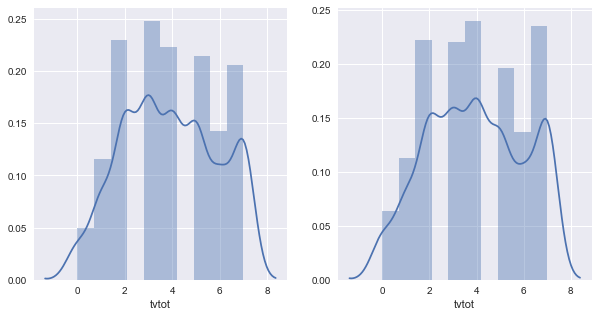

In [103]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df[(df.year==2012)&(df.gndr=='male')]['tvtot'], bins=10)
plt.subplot(1,2,2)
sns.distplot(df[(df.year==2012)&(df.gndr=='female')]['tvtot'], bins=10)


In [105]:
print(ttest_ind(df[(df.year==2012)&(df.gndr=='male')]['tvtot'],df[(df.year==2012)&(df.gndr=='female')]['tvtot']))
print(kruskal(df[(df.year==2012)&(df.gndr=='male')]['tvtot'],df[(df.year==2012)&(df.gndr=='female')]['tvtot']))

Ttest_indResult(statistic=-0.6289984272035916, pvalue=0.5293835369475063)
KruskalResult(statistic=0.4901914715824892, pvalue=0.4838419057978456)


In [110]:
df.pplfair= df.pplfair.bfill()

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Single Participants Fairness Score')

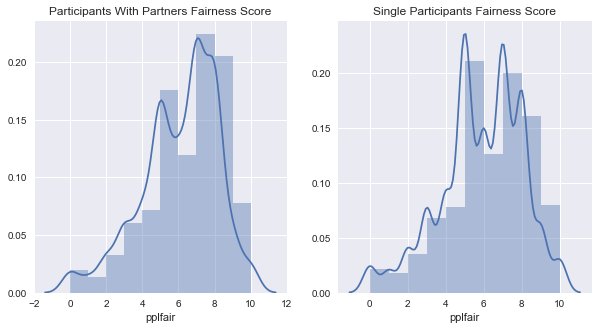

In [113]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df[(df.year==2012)&(df.partner=='yes')]['pplfair'], bins=10)
plt.title('Participants With Partners Fairness Score')
plt.subplot(1,2,2)
sns.distplot(df[(df.year==2012)&(df.partner=='no')]['pplfair'], bins=10)
plt.title('Single Participants Fairness Score')

In [118]:
print(ttest_ind(df[(df.year==2012)&(df.partner=='yes')]['pplfair'], df[(df.year==2012)&(df.partner=='no')]['pplfair']))

Ttest_indResult(statistic=3.2333453186250942, pvalue=0.001232764957079229)


In [117]:
display(df[(df.year==2012)&(df.partner=='yes')][['pplfair']].describe())
display(df[(df.year==2012)&(df.partner=='no')][['pplfair']].describe())


,pplfair
count,2674.000000
mean,6.075168
std,2.120032
min,0.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


,pplfair
count,1616.000000
mean,5.857673
std,2.159186
min,0.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


The T-test statistic shows that participants that live with a partner differ from single participants significantly in their fairness scores. People who live with a partner are more likely to give a higher fairness score. The mean fairness score in those with a partner is 6.07 compared to 5.86 for single participants. The median fairness score in those with a partner is 7 compared to 6 for single participants.

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


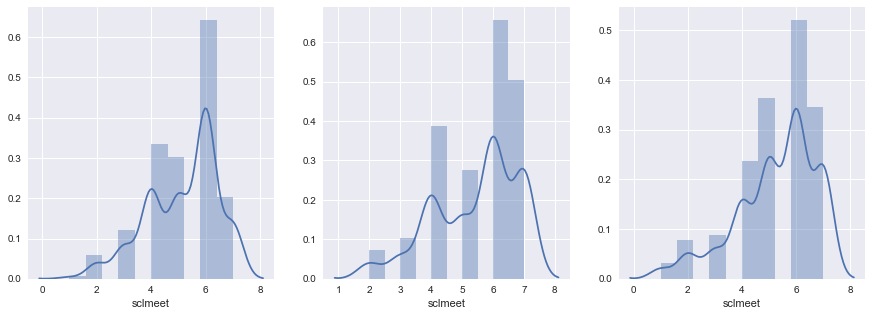

In [132]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df[(df.cntry=='CH')&(df.year==2014)]['sclmeet'], bins=10)
plt.subplot(1,3,2)
sns.distplot(df[(df.cntry =='SE')&(df.year==2014)]['sclmeet'], bins=10)
plt.subplot(1,3,3)
sns.distplot(df[(df.cntry == 'ES')&(df.year==2014)]['sclmeet'], bins=10)

In [134]:
print(f_oneway(df[(df.cntry=='CH')&(df.year==2014)]['sclmeet'], 
               df[(df.cntry =='SE')&(df.year==2014)]['sclmeet'], 
               df[(df.cntry == 'ES')&(df.year==2014)]['sclmeet']))

F_onewayResult(statistic=7.726189872970232, pvalue=0.00045029171320945256)


In [131]:
display(df[(df.cntry=='CH')&(df.year==2014)][['sclmeet']].describe())
display(df[(df.cntry=='SE')&(df.year==2014)][['sclmeet']].describe())
display(df[(df.cntry=='ES')&(df.year==2014)][['sclmeet']].describe())

,sclmeet
count,773.000000
mean,5.163001
std,1.309324
min,1.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,7.000000


,sclmeet
count,908.000000
mean,5.426211
std,1.373098
min,2.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,7.000000


,sclmeet
count,1213.000000
mean,5.262984
std,1.468343
min,1.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,7.000000


C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


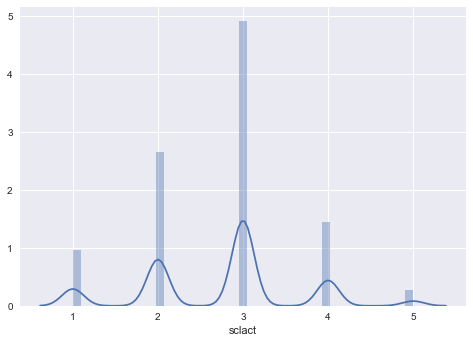

In [140]:
sns.distplot(df.sclact)

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


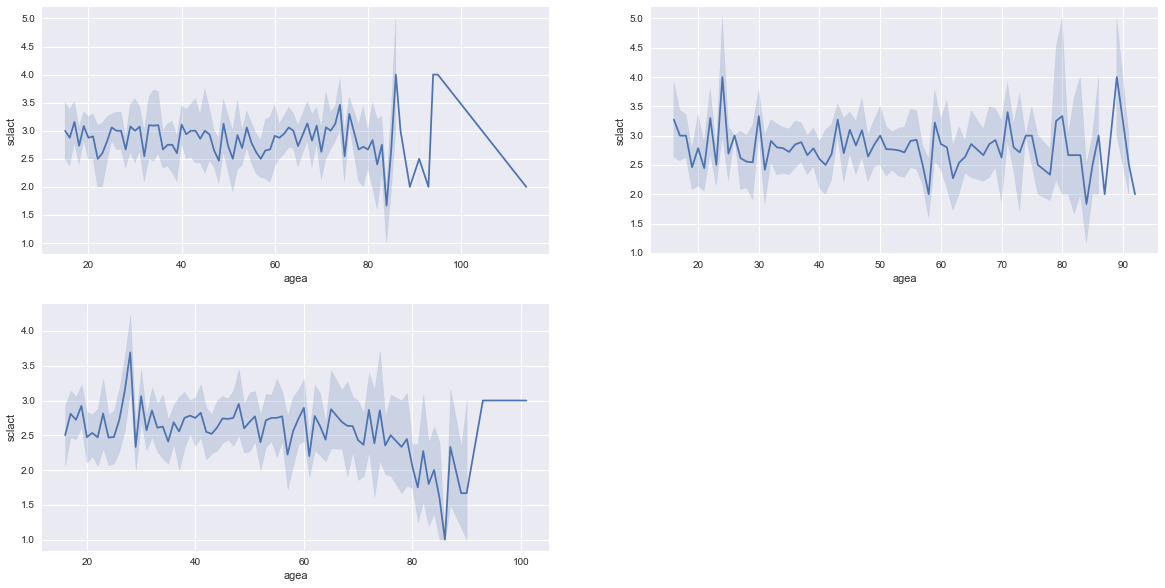

In [151]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=df[(df.cntry=='SE')&(df.year==2014)]['agea'], y=df[(df.cntry=='SE')&(df.year==2014)]['sclact'])
plt.subplot(2,2,2)
sns.lineplot(x=df[(df.cntry=='CH')&(df.year==2014)]['agea'], y=df[(df.cntry=='CH')&(df.year==2014)]['sclact'])
plt.subplot(2,2,3)
sns.lineplot(x=df[(df.cntry=='ES')&(df.year==2014)]['agea'], y=df[(df.cntry=='ES')&(df.year==2014)]['sclact'])



Switzerland stands out because the population tends to maintain a constant social activity score of approximately 2.75. Spain has a lower average social activity score that sharply declines after age 70. All 3 countries tend to have outliers above the age of 90 that skews the graph.